In [21]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import time
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print("tf version:", tf.__version__)
import warnings
warnings.filterwarnings('ignore')

tf version: 2.13.0


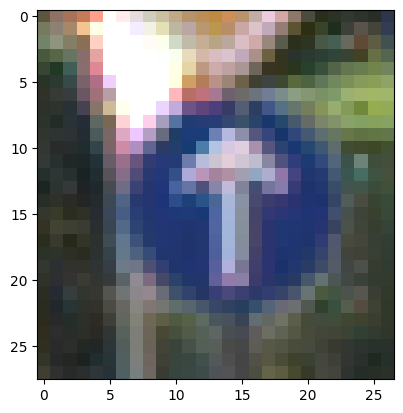

In [22]:
import matplotlib.pyplot as plt
img = load_img('../germany_dataset/train/35/00035_00032_00000.png')
plt.imshow(img)

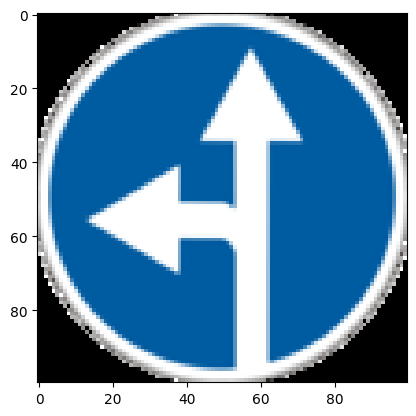

In [23]:
import matplotlib.pyplot as plt
img = load_img('../germany_dataset/meta/37.png')
plt.imshow(img)

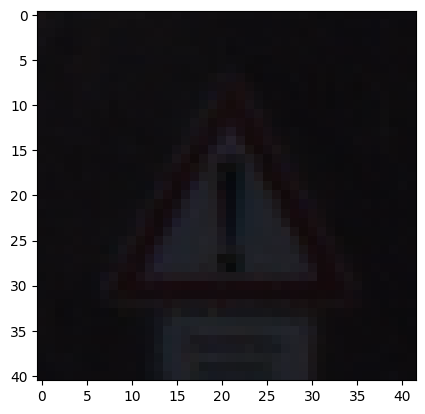

In [24]:
import matplotlib.pyplot as plt
img = load_img('../germany_dataset/test/01301.png')
plt.imshow(img)

In [25]:
df_meta=pd.read_csv('../germany_dataset/Meta.csv')
df_meta.head()

,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22


In [26]:
df_train=pd.read_csv('../germany_dataset/train.csv')
num_of_classes = df_train["ClassId"].nunique()
df_train.head(), df_train.shape

(   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
 0     27      26       5       5      22      20       20   
 1     28      27       5       6      23      22       20   
 2     29      26       6       5      24      21       20   
 3     28      27       5       6      23      22       20   
 4     28      26       5       5      23      21       20   
 
                              Path  
 0  Train/20/00020_00000_00000.png  
 1  Train/20/00020_00000_00001.png  
 2  Train/20/00020_00000_00002.png  
 3  Train/20/00020_00000_00003.png  
 4  Train/20/00020_00000_00004.png  ,
 (39209, 8))

In [27]:
def viewStatistics(df):
    #Statistics of Data
    print("Total Training Examples : ",len(df))
    values = df["ClassId"].value_counts()
    x_labels = [str(x) for x in range(num_of_classes)]
    y_labels = []
    for x in range(num_of_classes):
        y_labels.append(values[x])
    plt.figure(figsize=(15, 6))
    plt.bar(x_labels,y_labels,width=0.5)
    plt.title('Bar Graph')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [28]:
from imblearn.over_sampling import RandomOverSampler

Total Training Examples :  39209


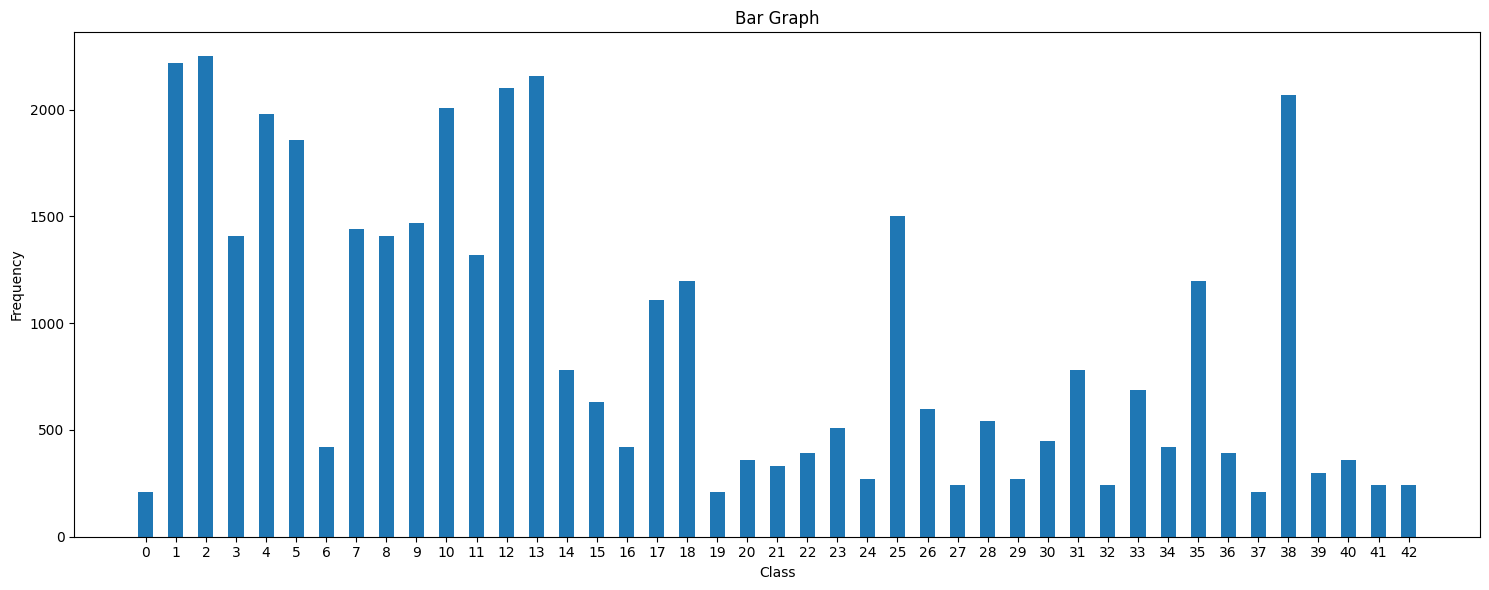

In [29]:
#Statistics of Data
viewStatistics(df_train)

In [30]:
df_test=pd.read_csv('../germany_dataset/test.csv')
df_test.head(), df_test.shape

(   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
 0     53      54       6       5      48      49       16  Test/00000.png
 1     42      45       5       5      36      40        1  Test/00001.png
 2     48      52       6       6      43      47       38  Test/00002.png
 3     27      29       5       5      22      24       33  Test/00003.png
 4     60      57       5       5      55      52       11  Test/00004.png,
 (12630, 8))

In [31]:
df_train=df_train[['ClassId','Path']]
df_train.head()

,ClassId,Path
0,20,Train/20/00020_00000_00000.png
1,20,Train/20/00020_00000_00001.png
2,20,Train/20/00020_00000_00002.png
3,20,Train/20/00020_00000_00003.png
4,20,Train/20/00020_00000_00004.png


Total Training Examples :  96750


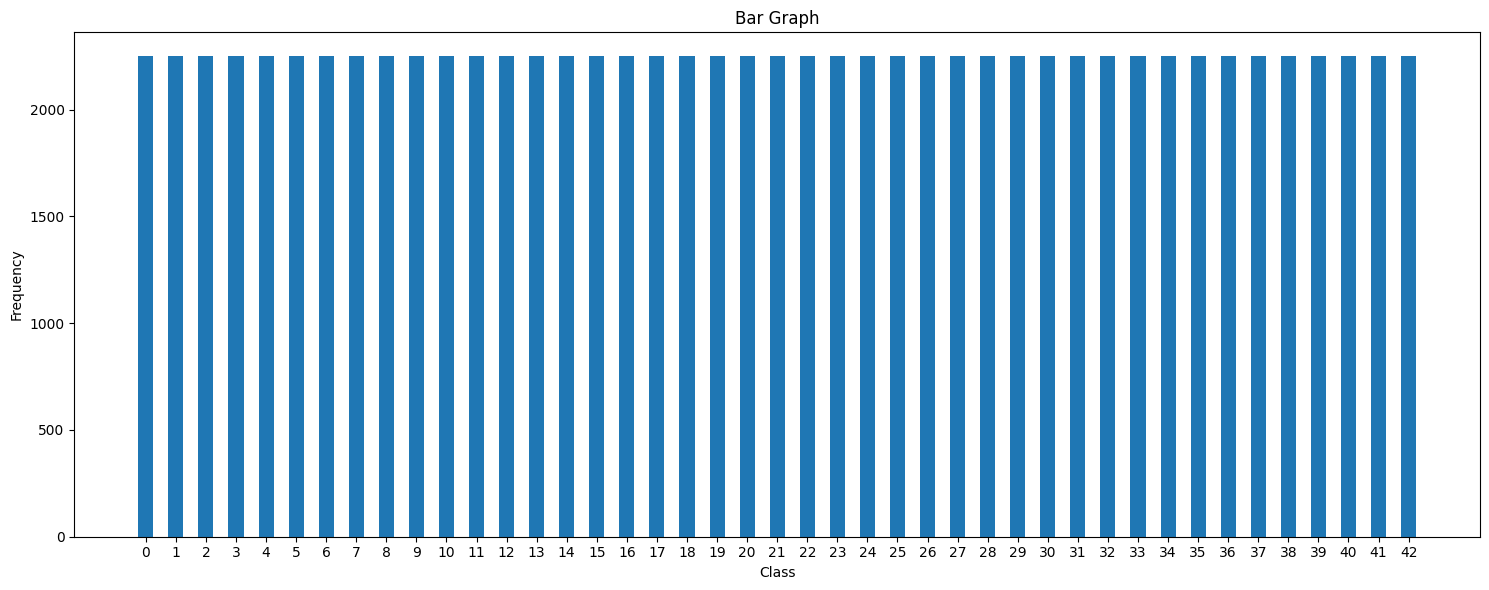

In [32]:
Y_col_name = "ClassId"
X = df_train.drop(Y_col_name, axis=1)
y = df_train[Y_col_name]
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Fit and apply the oversampler to the data
X_resampled, y_resampled = oversampler.fit_resample(X, y)

df_train = pd.DataFrame(X_resampled, columns=X.columns)
df_train[Y_col_name] = y_resampled

viewStatistics(df_train)

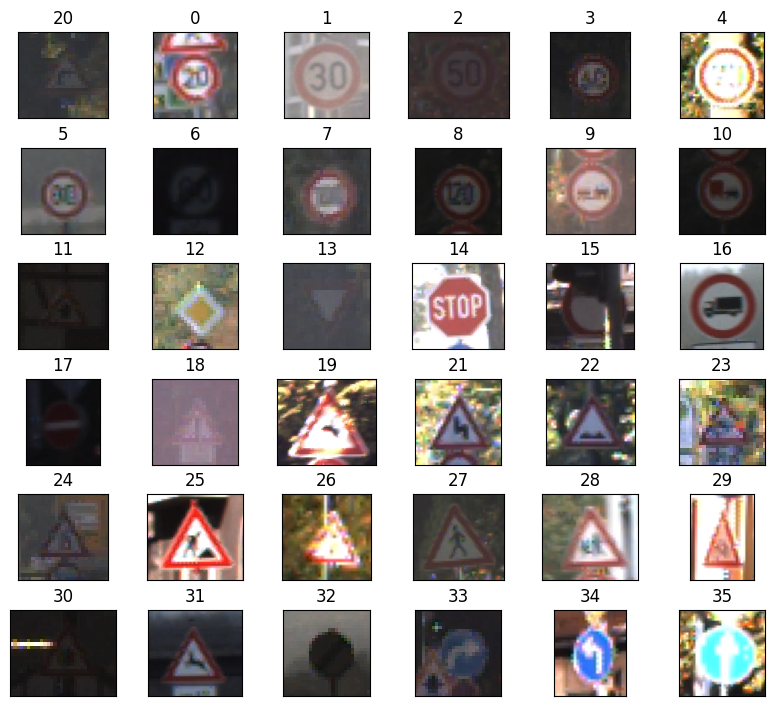

In [33]:
path='../germany_dataset/'
df_unique = df_train.copy().drop_duplicates(subset=["ClassId"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(path + str(df_unique.Path[i])))
    ax.set_title(df_unique.ClassId[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [34]:
import cv2
path='../germany_dataset/'
def img_preprocess(df_input):
    X = []
    for img_path in df_input:
        img = cv2.imread(path + str(img_path))

        if img is None:
            print(f"Image cannot be loaded: {img_path}")
            continue

        img = cv2.resize(img, (30, 30))

        img = img / 255.0

        X.append(img)
    X = np.array(X)
    return X

In [35]:
X=img_preprocess(df_train['Path'])

In [36]:
y=df_train['ClassId'].to_numpy()

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=42)

KeyboardInterrupt: 

In [ ]:
X_train.shape

In [ ]:
from tensorflow.keras.layers import Input, Dense, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten,Dropout, BatchNormalization
from keras.models import Sequential

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(30, 30, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(43, activation='softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
starting_time = time.time()
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,verbose=1)

ending_time = time.time()
total_time = ending_time - starting_time
total_time/=60

print("Time taken fit : ",total_time," min")

In [ ]:
df_test["ClassId"] =df_test["ClassId"].astype(int)
print("Number of Test Images are ", len(df_test))
df_test.dropna()
df_test.head()

In [ ]:
X_test = img_preprocess(df_test["Path"])

In [ ]:
y_test = df_test["ClassId"].values

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
print(y_pred)

In [ ]:
print(y_test)

In [ ]:
confusion = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = np.sum(np.diag(confusion)) / np.sum(confusion)
print("Total Accuracy: ", accuracy*100)

# Calculate precision, recall, and F1-score
classification_rep = classification_report(y_test, y_pred, labels=np.unique(y_pred))

# Print the results
print("\nConfusion Matrix:\n", confusion)


lines = classification_rep.split('\n')
data = []

for line in lines[2:-5]:  # Exclude header and footer lines
    row_data = line.split()
    if len(row_data) > 0:
        class_name = row_data[0]
        precision = float(row_data[1])
        recall = float(row_data[2])
        f1_score = float(row_data[3])
        support = int(float(row_data[4]))
        data.append([class_name, precision, recall, f1_score, support])

# Create a DataFrame
report = pd.DataFrame(data, columns=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'])
# Print the DataFrame
print("\n\n\n Summarizing the results : ")
report

In [ ]:
class_names = []
for i in range(num_of_classes):
    class_names.append("Class "+str(i))
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=False, cmap="viridis", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()